<a href="https://colab.research.google.com/github/sling1678/ML_programs_for_video_lectures/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTS
import sys
import numpy as np
import matplotlib.pyplot as plt

Done by iteration = 12
converged = True, coefficients = [10.03688944 -3.94251993 -0.92276853]


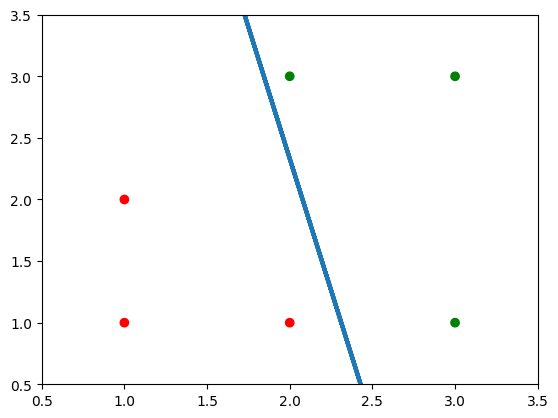

In [3]:
# PERCEPTRON IN ONE PANEL
def initialize_w(sz):
    return 0.1 * np.random.random(sz)

def pla_update(X,y,w):
    
    """
    Helper function to implement w(t+1) = w(t) + y_i * x_i for misclassified data (x_i,y_i)
    in one complete episode of all data points in the dataset.
    Inputs:
    X is Nxp Numpy ndarray and y is Nx1 Numpy array.
    y has values in {-1, 1}.
    Returns:
    w 
    found_separating_line:bool
    """
    X0_column = np.expand_dims(np.ones(X.shape[0]), axis=1)
    Xe = np.concatenate((X0_column, X), axis=1) #OK, introduces x0 column
    found_separating_line = True
    for idx in range(len(Xe)):
        h = np.dot(w, Xe[idx])
        if np.sign(h) != y[idx]:
            # update w
            w = w + y[idx] * Xe[idx]
            found_separating_line = False # since updated in this cycle through the data
    return w, found_separating_line

def pla(X,y, max_iter = 1000):
    """
    Implements perceptron learning algorithm.
    X is Nxp Numpy ndarray and y is Nx1 Numpy array.
    y has values in {-1, 1}.
    """
    w = initialize_w(X.shape[1] + 1) # plus 1 for the intercept, i.e., coeff o x0
    found_separating_line = False
    iteration = 0
    while iteration < max_iter + 1: # last one is a check
        iteration += 1
        w, found_separating_line = pla_update(X, y, w) # one pass through all data points
        if found_separating_line:
            print(f"Done by iteration = {iteration}")
            break
    return w, found_separating_line       

def plot_pla_2d(X,y,w, x_cols, savefig_filename=None):

    a, b = x_cols
    x1 = X[:, a]
    x2 = X[:, b]

    w0, w1, w2 = w[0], w[a+1], w[b+1]
    x3 = -(w1/w2) * x1 - w0/w2 #OK

    fig, ax = plt.subplots(1,1)
    colors = ["red" if a==1 else "green" for a in y]
    ax.scatter(x1,x2, c=colors, marker="o")
    ax.plot(x1,x3, lw=3)
    ax.set_xlim((np.min(x1)- 0.5, np.max(x1)+0.5))
    ax.set_ylim((np.min(x2)-0.5,np.max(x2)+0.5))
    if savefig_filename is not None:
        plt.savefig(savefig_filename)
    plt.show()

def simulate_pla(X,y, max_iter=1000, show_plot=False):

    w_for_plots=[]
    X0_column = np.expand_dims(np.ones(X.shape[0]), axis=1)
    Xe = np.concatenate((X0_column, X), axis=1) #OK
    w = initialize_w(Xe.shape[1])
    
    iteration = 0
    while iteration < max_iter + 1: # last one is a check
        iteration += 1
        w, found_separating_line = pla_update(X, y, w) # one pass through all data points
        w_for_plots.append(w)
        if found_separating_line:
            print(f"Done by iteration = {iteration}")
            break
    if show_plot:
        fig, ax = plt.subplots(1,1, figsize=(12, 7))
        x1 = X[:,0]
        x2 = X[:,1]
        
        colors = ["red" if a==1 else "green" for a in y]
        ax.scatter(x1,x2, c=colors, marker="o")

        for w in w_for_plots:
            x3 = -(w[1]/w[2]) * x1 - w[0]/w[2]
            ax.plot(x1,x3, lw=2, alpha=0.5 , label=f"({iteration})")
            ax.text(x1[0], x3[0], f'({iteration})')
        ax.set_xlim((0.5,3.5))
        ax.set_ylim((0.5,3.5))
        plt.legend()
        plt.show()

    return w, found_separating_line

def get_data():
    # test data
    X = np.array([
        [1,1], [2,1], [3,1], [1,2], [2,3], [3,3]
    ])
    y = np.array([[1],[1],[-1],[1],[-1],[-1]])
    return X, y
def main(cli=False):
    if cli:
      #print(sys.argv)
      if len(sys.argv) > 1:
          max_iter = int(sys.argv[1])
      else:
          max_iter = 1000
    else:
      max_iter = 1000
  
    X, y = get_data()
    w, has_converged = pla(X,y, max_iter)
    print(f"converged = {has_converged}, coefficients = {w}")
    if has_converged:
        plot_pla_2d(X,y,w, (0,1), "pla.png")

main()